In [1]:
import pandas as pd
import re
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
df = pd.read_csv("DailyActivities.csv")

In [3]:
df.shape

(223, 106)

In [4]:
df.head()

,Timestamp,"Confidentiality and Privacy: Your privacy is important to us. All responses you provide will be kept strictly confidential and anonymous, and the results will only be analyzed in aggregate. Your personal information will not be shared with any third parties, and the data collected will be used for research purposes only.\nVoluntary Participation: Participation in this study is entirely voluntary, and you have the right to withdraw at any time during the period the questionnaire is available for your completion. \nContact Information: If you have any questions or concerns about the study, please feel free to contact us at: Ashrin Mobashira Shifa (ashrin.shifa@northsouth.edu)\nBy checking the ""I Agree"" box below, you indicate your voluntary consent to participate in this research study.",Gender,Age,Occupation,Marital status,Monthly household income (approximate),What activities were you involved in between 5:00 AM - 5:30 AM? Please select the most applicable option from the menu provided.,What activities were you involved in between 5:30 AM - 6:00 AM? Please select the most applicable option from the menu provided.,What activities were you involved in between 6:00 AM - 6:30 AM? Please select the most applicable option from the menu provided.,...,What was you activity between 1:30 AM - 2:00 AM ? Please select the most applicable option from the menu provided..1,What was you activity between 2:00 AM - 2:30 AM ? Please select the most applicable option from the menu provided..1,What was you activity between 2:30 AM - 3:00 AM ? Please select the most applicable option from the menu provided..1,What was you activity between 3:00 AM - 3:30 AM ? Please select the most applicable option from the menu provided..1,What was you activity between 3:30 AM - 4:00 AM ? Please select the most applicable option from the menu provided..1,What was you activity between 4:00 AM - 4:30 AM ? Please select the most applicable option from the menu provided..1,What was you activity between 4:30 AM - 5:00 AM ? Please select the most applicable option from the menu provided..1,"When I must choose between the two, I usually dress for fashion, not for comfort.",An important part of my life and activities is dressing smartly.,A person should try to dress in style.
0,2023/09/21 6:19:47 PM GMT+6,I Agree,Female,23,Student,Single,0,Sleeping,Sleeping,Sleeping,...,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,2,3,3
1,2023/09/23 10:48:07 PM GMT+6,I Agree,Female,23,Student,Single,100000,Sleeping,Sleeping,Personal Care,...,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,3,2,3
2,2023/09/23 10:53:57 PM GMT+6,I Agree,Female,25,Student,Single,200000,Sleeping,Sleeping,Sleeping,...,Video Games,Exercise,Sleeping,Sleeping,Sleeping,Sleeping,Religion or Spiritual Activities,3,4,3
3,2023/09/23 10:57:50 PM GMT+6,I Agree,Male,23,Student,Single,100000,Sleeping,Sleeping,Sleeping,...,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,3,5,5
4,2023/09/23 10:59:18 PM GMT+6,I Agree,Male,23,Student,Single,90000,Religion or Spiritual Activities,Sleeping,Sleeping,...,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,2,2,2


In [5]:
# Get the earliest and latest timestamp
earliest_time = df['Timestamp'].min()
latest_time = df['Timestamp'].max()

print(f"Earliest time: {earliest_time}")
print(f"Latest time: {latest_time}")

Earliest time: 2023/09/21 6:19:47 PM GMT+6
Latest time: 2024/03/02 9:47:05 PM GMT+6


In [6]:
def convert_to_24_hour_format(time_str):
    """Convert the time string from 12-hour to 24-hour format if needed."""
    try:
        # Attempt to parse as 12-hour format
        return datetime.strptime(time_str, "%I:%M %p").strftime("%H:%M")
    except ValueError:
        # If parsing fails, assume it's already in 24-hour format
        return time_str

In [7]:
def rename_columns(col, index):
    """Rename columns based on whether they correspond to weekdays or weekends."""
    # Match the time intervals in the column name
    match = re.search(r'(\d{1,2}:\d{2} [APM]{2}) - (\d{1,2}:\d{2} [APM]{2})', col)
    if match:
        # Convert both times to 24-hour format
        start_time = convert_to_24_hour_format(match.group(1))
        end_time = convert_to_24_hour_format(match.group(2))
        
        # Determine if it's a weekday or weekend column based on the index
        if 6 <= index < 55:  # First 48 columns are weekdays (starting after the 6 initial non-time columns)
            return f"Weekday_{start_time}-{end_time}"
        elif 55 <= index < 103:  # Next 48 columns are weekends
            return f"Weekend_{start_time}-{end_time}"
    return col

In [8]:
# Apply the rename_columns function to each column in the dataframe
df.columns = [rename_columns(col, idx) for idx, col in enumerate(df.columns)]

In [9]:
pd.set_option("display.max_columns", None)

# Output the renamed columns
print(df.columns.tolist())

['Timestamp', 'Confidentiality and Privacy: Your privacy is important to us. All responses you provide will be kept strictly confidential and anonymous, and the results will only be analyzed in aggregate. Your personal information will not be shared with any third parties, and the data collected will be used for research purposes only.\nVoluntary Participation: Participation in this study is entirely voluntary, and you have the right to withdraw at any time during the period the questionnaire is available for your completion. \nContact Information: If you have any questions or concerns about the study, please feel free to contact us at: Ashrin Mobashira Shifa (ashrin.shifa@northsouth.edu)\nBy checking the "I Agree" box below, you indicate your voluntary consent to participate in this research study.', 'Gender', 'Age', 'Occupation', 'Marital status', 'Monthly household income (approximate)', 'Weekday_05:00-05:30', 'Weekday_05:30-06:00', 'Weekday_06:00-06:30', 'Weekday_06:30-07:00', 'Wee

In [10]:
df.rename(columns={"When I must choose between the two, I usually dress for fashion, not for comfort.": "FashionPref"}, inplace=True)
df.rename(columns={"An important part of my life and activities is dressing smartly.": "SmartDresserPref"}, inplace=True)
df.rename(columns={"A person should try to dress in style.": "StylePref"}, inplace=True)
df.rename(columns={"Monthly household income (approximate)": "HouseHoldIncome"}, inplace=True)

In [11]:
df.drop(columns=[df.columns[0], df.columns[1]], inplace=True)
df.head()

,Gender,Age,Occupation,Marital status,HouseHoldIncome,Weekday_05:00-05:30,Weekday_05:30-06:00,Weekday_06:00-06:30,Weekday_06:30-07:00,Weekday_07:00-07:30,Weekday_07:30-08:00,Weekday_08:00-08:30,Weekday_08:30-09:00,Weekday_09:00-09:30,Weekday_09:30-10:00,Weekday_10:00-10:30,Weekday_10:30-11:00,Weekday_11:00-11:30,Weekday_11:30-12:00,Weekday_12:00-12:30,Weekday_12:30-13:00,Weekday_13:00-13:30,Weekday_13:30-14:00,Weekday_14:00-14:30,Weekday_14:30-15:00,Weekday_15:00-15:30,Weekday_15:30-16:00,Weekday_16:00-16:30,Weekday_16:30-17:00,Weekday_17:00-17:30,Weekday_17:30-18:00,Weekday_18:00-18:30,Weekday_18:30-19:00,Weekday_19:00-19:30,Weekday_19:30-20:00,Weekday_20:00-20:30,Weekday_20:30-21:00,Weekday_21:00-21:30,Weekday_21:30-22:00,Weekday_22:00-22:30,Weekday_22:30-23:00,Weekday_23:00-23:30,Weekday_23:30-00:00,Weekday_00:00-00:30,Weekday_00:30-01:00,Weekday_01:00-01:30,Weekday_01:30-02:00,Weekday_02:00-02:30,Weekday_02:30-03:00,Weekday_03:00-03:30,Weekday_03:30-04:00,Weekday_04:00-04:30,Weekday_04:30-05:00,Weekend_05:00-05:30,Weekend_05:30-06:00,Weekend_06:00-06:30,Weekend_06:30-07:00,Weekend_07:00-07:30,Weekend_07:30-08:00,Weekend_08:00-08:30,Weekend_08:30-09:00,Weekend_09:00-09:30,Weekend_09:30-10:00,Weekend_10:00-10:30,Weekend_10:30-11:00,Weekend_11:00-11:30,Weekend_11:30-12:00,Weekend_12:00-12:30,Weekend_12:30-13:00,Weekend_13:00-13:30,Weekend_13:30-14:00,Weekend_14:00-14:30,Weekend_14:30-15:00,Weekend_15:00-15:30,Weekend_15:30-16:00,Weekend_16:00-16:30,Weekend_16:30-17:00,Weekend_17:00-17:30,Weekend_17:30-18:00,Weekend_18:00-18:30,Weekend_18:30-19:00,Weekend_19:00-19:30,Weekend_19:30-20:00,Weekend_20:00-20:30,Weekend_20:30-21:00,Weekend_21:00-21:30,Weekend_21:30-22:00,Weekend_22:00-22:30,Weekend_22:30-23:00,Weekend_23:00-23:30,Weekend_23:30-00:00,Weekend_00:00-00:30,Weekend_00:30-01:00,Weekend_01:00-01:30,Weekend_01:30-02:00,Weekend_02:00-02:30,Weekend_02:30-03:00,Weekend_03:00-03:30,Weekend_03:30-04:00,Weekend_04:00-04:30,Weekend_04:30-05:00,FashionPref,SmartDresserPref,StylePref
0,Female,23,Student,Single,0,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Religion or Spiritual Activities,Housework,Eating,University Class,University Class,University Class,Phone Calls,Socializing,Family Time,Cooking,Cooking,Housework,Housework,Personal Care,Personal Care,University Class,University Class,Sleeping,Sleeping,Religion or Spiritual Activities,Religion or Spiritual Activities,Eating,Study,Study,Study,Cooking,Cooking,Personal Care,Study,Eating,Study,Study,Study,Study,Study,Reading or Writing,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Religion or Spiritual Activities,Religion or Spiritual Activities,Eating,Personal Care,Housework,Housework,Cooking,Cooking,Cooking,Family Time,Phone Calls,Eating,Sleeping,Sleeping,Sleeping,Traveling,Socializing,Traveling,Personal Care,Personal Care,Sleeping,Sleeping,Study,Study,Study,Study,Study,Study,Eating,Eating,Study,Study,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,2,3,3
1,Female,23,Student,Single,100000,Sleeping,Sleeping,Personal Care,Personal Care,Eating,Traveling,University Class,University Class,University Class,University Class,University Class,Socializing,Socializing,Socializing,Eating,Eating,Work,Work,Work,Work,Work,Socializing,Socializing,Travelling,Entertainment,Entertainment,Study,Study,Study,Study,Study,Eating,Eating,Personal Care,Entertainment,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Eating,Eating,Study,Study,Study,Study,Entertainment,Study,Study,Study,Study,Eating,Eating,Caring for Pets,Entertainment,Entertainment,Entertainment,Entertainment,Entertainment,Entertainment,Study,Study,Study,Study,Study,Study,Eating,Eating,Entertainment,Entertainment,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleep

In [12]:
df.shape

(223, 104)

# Handling Null values

In [13]:
null_counts = df.isnull().sum()

for column, count in null_counts.items():
    if count != 0:
        print(f"{column}: {count}")

HouseHoldIncome: 11


In [14]:
# Replacing HouseHoldIncome NUll values with mean of the values
# Convert any non-numeric values to NaN
df['HouseHoldIncome'] = pd.to_numeric(df['HouseHoldIncome'], errors='coerce')

# Calculate the mean value of the HouseHoldIncome column, ignoring NaNs
mean_income = df['HouseHoldIncome'].mean()

# Replace NaNs in the HouseHoldIncome column with the calculated mean
df['HouseHoldIncome'] = df['HouseHoldIncome'].fillna(mean_income)

In [15]:
male_count = df['Gender'].value_counts().get('Male', 0)
female_count = df['Gender'].value_counts().get('Female', 0)

In [16]:
print("Male Count: ", male_count)
print("female count: ", female_count)

Male Count:  147
female count:  76


In [17]:
null_counts = df.isnull().sum()

for column, count in null_counts.items():
    if count != 0:
        print(f"{column}: {count}")
#No NUll values anymore

In [18]:
# Calculate the 25th and 75th percentiles
q1 = df['HouseHoldIncome'].quantile(0.25)
q3 = df['HouseHoldIncome'].quantile(0.75)

# Define the bins using the 25th and 75th percentiles
bins = [-float('inf'), q1, q3, float('inf')]
labels = ['Low', 'Moderate', 'High']

# Create a new column with income group labels
df['IncomeGroup'] = pd.cut(df['HouseHoldIncome'], bins=bins, labels=labels, include_lowest=True)

In [19]:
# Calculate the 25th and 75th percentiles
q1 = df['HouseHoldIncome'].quantile(0.25)
q3 = df['HouseHoldIncome'].quantile(0.75)

# Print the quartiles and moderate range in a formatted way
print(f"1st Quartile (Q1) - 25th Percentile: ${q1:,.2f}")
print(f"3rd Quartile (Q3) - 75th Percentile: ${q3:,.2f}")
print(f"Moderate Income Range: ${q1:,.2f} - ${q3:,.2f}")

1st Quartile (Q1) - 25th Percentile: $20,000.00
3rd Quartile (Q3) - 75th Percentile: $200,000.00
Moderate Income Range: $20,000.00 - $200,000.00


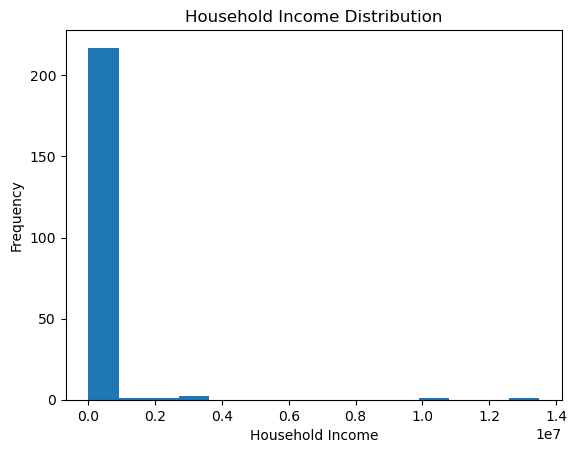

In [20]:
plt.hist(df['HouseHoldIncome'], bins=15)
plt.title('Household Income Distribution')
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.show()

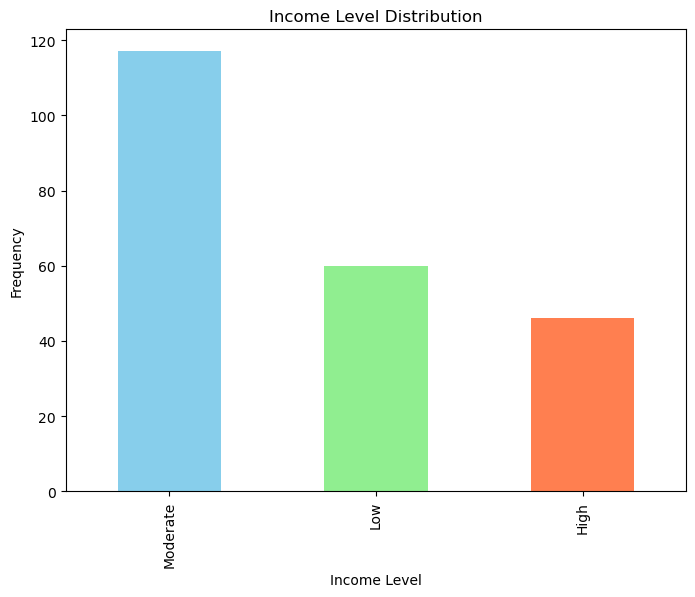

In [21]:
# Count the number of occurrences for each IncomeGroup
income_group_counts = df['IncomeGroup'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
income_group_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'coral'])

# Adding titles and labels
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

In [22]:
# Replace all occurrences of "Traveling" with "Travelling" in the DataFrame
df.replace("Traveling", "Travelling", inplace=True)

In [23]:
# Extract columns related to weekdays and weekends
weekday_columns = [col for col in df.columns if col.startswith('Weekday_')]
weekend_columns = [col for col in df.columns if col.startswith('Weekend_')]

# Combine the columns related to both weekdays and weekends
all_time_columns = weekday_columns + weekend_columns

# Create an empty set to store unique tasks (using a set to automatically handle duplicates)
all_unique_activity_set = set()

# Iterate over each row and add the tasks to the set
for col in all_time_columns:
    unique_activities = df[col].unique()  # Get unique activities for the current column
    all_unique_activity_set.update(unique_activities)  # Add unique activities to the set

# Convert the set to a sorted list
all_unique_activity_list = sorted(all_unique_activity_set)

# Display the list of all unique tasks
print(f"Total unique tasks performed over the week: {len(all_unique_activity_list)}")
print(all_unique_activity_list)


Total unique tasks performed over the week: 23
['Caring for Pets', 'Cooking', 'Eating', 'Entertainment', 'Exercise', 'Family Time', 'Gardening', 'Housework', 'Nightlife', 'Personal Care', 'Phone Calls', 'Reading or Writing', 'Religion or Spiritual Activities', 'Shopping', 'Sleeping', 'Socializing', 'Sports', 'Study', 'Travelling', 'University Class', 'Video Games', 'Volunteering', 'Work']


# Calculating aggregated duration times 

In [24]:
# Define active activities
active_activities = [
    'University Class', 'Study', 'Exercise', 'Work',
    'Housework', 'Cooking'
]

In [25]:
# Define neutral activities
neutral_activities = [
    'Personal Care', 'Travelling', 'Phone Calls', 'Caring for Pets', 
    'Volunteering', 'Gardening'
]

In [26]:
# Define leisure activities
leisure_activities = [
    'Sleeping', 'Entertainment', 'Eating', 'Socializing', 'Video Games', 
    'Religion or Spiritual Activities', 'Shopping', 'Family Time', 'Sports', 
    'Reading or Writing', 'Nightlife'
]

In [27]:
# Define the mapping of activities to be combined
combined_activity_mappings = {
    'Entertainment_merged_duration': ['Entertainment', 'Video Games'],
    'Personal_care_merged_duration': ['Personal Care', 'Phone Calls'],
    'Housework_merged_duration': ['Housework', 'Cooking']
}

In [28]:
# Find the number of time slots labeled as 'Sleeping' in row 1 ---------------For Testing
sleeping_intervals_weekday = df.loc[0, weekday_columns] == 'Sleeping'
sleeping_intervals_weekend = df.loc[0, weekend_columns] == 'Sleeping'

# Count the number of True values in each
total_sleeping_weekday = sleeping_intervals_weekday.sum() / 2
total_sleeping_weekend = sleeping_intervals_weekend.sum() / 2 

print(f"Total Sleeping intervals during weekdays in row 1: {total_sleeping_weekday}")
print(f"Total Sleeping intervals during weekends in row 1: {total_sleeping_weekend}")

Total Sleeping intervals during weekdays in row 1: 7.0
Total Sleeping intervals during weekends in row 1: 10.5


In [29]:
# Calculate durations
def calculate_durations(activity_list, columns):
    duration = np.zeros(df.shape[0])
    for activity in activity_list:
        for col in columns:
            duration += (df[col] == activity).astype(int)
    return duration * 0.5

In [30]:
# Define individual activities
individual_activities = [
    'Sleeping', 'University Class', 'Study', 'Exercise', 'Work', 'Housework', 'Cooking',
    'Entertainment', 'Personal Care', 'Eating', 'Socializing', 'Video Games', 'Religion or Spiritual Activities', 
    'Shopping', 'Family Time', 'Sports', 'Reading or Writing', 'Nightlife',
    'Travelling', 'Caring for Pets', 'Volunteering', 'Gardening', 'Phone Calls'
]

# Calculate durations for each individual activity for weekdays and weekends
for activity in individual_activities:
    df[f'{activity.replace(" ", "_")}_duration_weekday'] = calculate_durations([activity], [col for col in df.columns if col.startswith('Weekday_')])
    df[f'{activity.replace(" ", "_")}_duration_weekend'] = calculate_durations([activity], [col for col in df.columns if col.startswith('Weekend_')])


In [31]:
# Calculate durations for each individual activity for weekdays and weekends
for activity in individual_activities:
    df[f'{activity.replace(" ", "_")}_duration_weekday'] = calculate_durations([activity], [col for col in df.columns if col.startswith('Weekday_')])
    df[f'{activity.replace(" ", "_")}_duration_weekend'] = calculate_durations([activity], [col for col in df.columns if col.startswith('Weekend_')])

In [32]:
# Calculate combined durations for activities with multiple components
for column, activities in combined_activity_mappings.items():
    df[column + '_weekday'] = calculate_durations(activities, [col for col in df.columns if col.startswith('Weekday_')])
    df[column + '_weekend'] = calculate_durations(activities, [col for col in df.columns if col.startswith('Weekend_')])

In [33]:
# Calculate durations for weekdays and weekends
for category, activities in {
    'Active': active_activities,
    'Leisure': leisure_activities,
    'Neutral': neutral_activities
}.items():
    df[f'{category}_duration_weekday'] = calculate_durations(activities, [col for col in df.columns if col.startswith('Weekday_')])
    df[f'{category}_duration_weekend'] = calculate_durations(activities, [col for col in df.columns if col.startswith('Weekend_')])


In [34]:
# Calculate combined durations for activities with multiple components
for column, activities in combined_activity_mappings.items():
    df[column + '_weekday'] = calculate_durations(activities, [col for col in df.columns if col.startswith('Weekday_')])
    df[column + '_weekend'] = calculate_durations(activities, [col for col in df.columns if col.startswith('Weekend_')])

In [35]:
# Display the updated dataframe with calculated durations
print(df[['Active_duration_weekday', 'Leisure_duration_weekday', 'Neutral_duration_weekday',
         'Active_duration_weekend', 'Leisure_duration_weekend', 'Neutral_duration_weekend']].head())

   Active_duration_weekday  Leisure_duration_weekday  \
0                     10.5                      11.5   
1                      7.5                      14.0   
2                      7.0                      16.5   
3                      7.5                      10.5   
4                      7.0                      17.0   

   Neutral_duration_weekday  Active_duration_weekend  \
0                       2.0                      6.5   
1                       2.5                      7.0   
2                       0.5                      0.5   
3                       6.0                      6.5   
4                       0.0                      8.0   

   Leisure_duration_weekend  Neutral_duration_weekend  
0                      14.5                       3.0  
1                      16.5                       0.5  
2                      22.5                       1.0  
3                      17.0                       0.5  
4                      15.0                   

# Checking if the active calculations are correct

In [36]:
# Print the duration for individual active activities for row 1
row_index = 1  # Specify the row number you want to check
individual_durations = {
    'University Class': np.sum(df.loc[row_index, weekday_columns] == 'University Class') * 0.5,
    'Study': np.sum(df.loc[row_index, weekday_columns] == 'Study') * 0.5,
    'Exercise': np.sum(df.loc[row_index, weekday_columns] == 'Exercise') * 0.5,
    'Work': np.sum(df.loc[row_index, weekday_columns] == 'Work') * 0.5,
    'Housework': np.sum(df.loc[row_index, weekday_columns] == 'Housework') * 0.5,
    'Cooking': np.sum(df.loc[row_index, weekday_columns] == 'Cooking') * 0.5
}

# Print individual durations
print("Individual durations for row", row_index, ":")
for activity, duration in individual_durations.items():
    print(f"{activity}: {duration} hours")

# Print total active duration for weekday and weekend for row 1
active_duration_weekday = df.loc[row_index, 'Active_duration_weekday']
active_duration_weekend = df.loc[row_index, 'Active_duration_weekend']

print("\nTotal active duration:")
print(f"Active duration (Weekday) for row {row_index}: {active_duration_weekday} hours")
print(f"Active duration (Weekend) for row {row_index}: {active_duration_weekend} hours")

Individual durations for row 1 :
University Class: 2.5 hours
Study: 2.5 hours
Exercise: 0.0 hours
Work: 2.5 hours
Housework: 0.0 hours
Cooking: 0.0 hours

Total active duration:
Active duration (Weekday) for row 1: 7.5 hours
Active duration (Weekend) for row 1: 7.0 hours


In [37]:
df.head()

,Gender,Age,Occupation,Marital status,HouseHoldIncome,Weekday_05:00-05:30,Weekday_05:30-06:00,Weekday_06:00-06:30,Weekday_06:30-07:00,Weekday_07:00-07:30,Weekday_07:30-08:00,Weekday_08:00-08:30,Weekday_08:30-09:00,Weekday_09:00-09:30,Weekday_09:30-10:00,Weekday_10:00-10:30,Weekday_10:30-11:00,Weekday_11:00-11:30,Weekday_11:30-12:00,Weekday_12:00-12:30,Weekday_12:30-13:00,Weekday_13:00-13:30,Weekday_13:30-14:00,Weekday_14:00-14:30,Weekday_14:30-15:00,Weekday_15:00-15:30,Weekday_15:30-16:00,Weekday_16:00-16:30,Weekday_16:30-17:00,Weekday_17:00-17:30,Weekday_17:30-18:00,Weekday_18:00-18:30,Weekday_18:30-19:00,Weekday_19:00-19:30,Weekday_19:30-20:00,Weekday_20:00-20:30,Weekday_20:30-21:00,Weekday_21:00-21:30,Weekday_21:30-22:00,Weekday_22:00-22:30,Weekday_22:30-23:00,Weekday_23:00-23:30,Weekday_23:30-00:00,Weekday_00:00-00:30,Weekday_00:30-01:00,Weekday_01:00-01:30,Weekday_01:30-02:00,Weekday_02:00-02:30,Weekday_02:30-03:00,Weekday_03:00-03:30,Weekday_03:30-04:00,Weekday_04:00-04:30,Weekday_04:30-05:00,Weekend_05:00-05:30,Weekend_05:30-06:00,Weekend_06:00-06:30,Weekend_06:30-07:00,Weekend_07:00-07:30,Weekend_07:30-08:00,Weekend_08:00-08:30,Weekend_08:30-09:00,Weekend_09:00-09:30,Weekend_09:30-10:00,Weekend_10:00-10:30,Weekend_10:30-11:00,Weekend_11:00-11:30,Weekend_11:30-12:00,Weekend_12:00-12:30,Weekend_12:30-13:00,Weekend_13:00-13:30,Weekend_13:30-14:00,Weekend_14:00-14:30,Weekend_14:30-15:00,Weekend_15:00-15:30,Weekend_15:30-16:00,Weekend_16:00-16:30,Weekend_16:30-17:00,Weekend_17:00-17:30,Weekend_17:30-18:00,Weekend_18:00-18:30,Weekend_18:30-19:00,Weekend_19:00-19:30,Weekend_19:30-20:00,Weekend_20:00-20:30,Weekend_20:30-21:00,Weekend_21:00-21:30,Weekend_21:30-22:00,Weekend_22:00-22:30,Weekend_22:30-23:00,Weekend_23:00-23:30,Weekend_23:30-00:00,Weekend_00:00-00:30,Weekend_00:30-01:00,Weekend_01:00-01:30,Weekend_01:30-02:00,Weekend_02:00-02:30,Weekend_02:30-03:00,Weekend_03:00-03:30,Weekend_03:30-04:00,Weekend_04:00-04:30,Weekend_04:30-05:00,FashionPref,SmartDresserPref,StylePref,IncomeGroup,Sleeping_duration_weekday,Sleeping_duration_weekend,University_Class_duration_weekday,University_Class_duration_weekend,Study_duration_weekday,Study_duration_weekend,Exercise_duration_weekday,Exercise_duration_weekend,Work_duration_weekday,Work_duration_weekend,Housework_duration_weekday,Housework_duration_weekend,Cooking_duration_weekday,Cooking_duration_weekend,Entertainment_duration_weekday,Entertainment_duration_weekend,Personal_Care_duration_weekday,Personal_Care_duration_weekend,Eating_duration_weekday,Eating_duration_weekend,Socializing_duration_weekday,Socializing_duration_weekend,Video_Games_duration_weekday,Video_Games_duration_weekend,Religion_or_Spiritual_Activities_duration_weekday,Religion_or_Spiritual_Activities_duration_weekend,Shopping_duration_weekday,Shopping_duration_weekend,Family_Time_duration_weekday,Family_Time_duration_weekend,Sports_duration_weekday,Sports_duration_weekend,Reading_or_Writing_duration_weekday,Reading_or_Writing_duration_weekend,Nightlife_duration_weekday,Nightlife_duration_weekend,Travelling_duration_weekday,Travelling_duration_weekend,Caring_for_Pets_duration_weekday,Caring_for_Pets_duration_weekend,Volunteering_duration_weekday,Volunteering_duration_weekend,Gardening_duration_weekday,Gardening_duration_weekend,Phone_Calls_duration_weekday,Phone_Calls_duration_weekend,Entertainment_merged_duration_weekday,Entertainment_merged_duration_weekend,Personal_care_merged_duration_weekday,Personal_care_merged_duration_weekend,Housework_merged_duration_weekday,Housework_merged_duration_weekend,Active_duration_weekday,Active_duration_weekend,Leisure_duration_weekday,Leisure_duration_weekend,Neutral_duration_weekday,Neutral_duration_weekend
0,Female,23,Student,Single,0.0,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Religion or Spiritual Activities,Housework,Eating,University Class,University Class,University Class,Phone Calls,Socializing,Family Time,Cooking,Cooking,Housework,Housework,Personal Care,Personal Car

# Creating Meal_times

In [38]:
def extract_time_range(col_name):
    """Extract the time range from the column name."""
    try:
        # Extract the time range from the column name
        time_range = col_name.split('_')[1]  # Get the time range part
        return time_range
    except IndexError:
        return None


In [39]:
def find_first_eating_time(row, time_columns, start_time, end_time):
    """
    Find the first time interval where 'Eating' is found within the specified start and end time.
    """
    for col in time_columns:
        if row[col] == 'Eating':
            time_range = extract_time_range(col)
            if time_range:
                start, end = time_range.split('-')
                
                # Check if the time range falls within the specified interval
                if start_time <= start < end_time:
                    return time_range
    return None

In [40]:
#Changing times

# Define meal time intervals
breakfast_start = '06:00'
breakfast_end = '11:00'
lunch_start = '12:00'
lunch_end = '14:00'
dinner_start = '18:00'
dinner_end = '23:59'  # Extend to the end of the day

In [41]:
# Separate weekday and weekend columns
weekday_columns = [col for col in df.columns if 'Weekday' in col]
weekend_columns = [col for col in df.columns if 'Weekend' in col]

In [42]:
# Apply the function to each row for Weekday and Weekend Breakfast, Lunch, and Dinner times
df['Weekday_Breakfast_time'] = df.apply(lambda row: find_first_eating_time(row, weekday_columns, breakfast_start, breakfast_end), axis=1)
df['Weekend_Breakfast_time'] = df.apply(lambda row: find_first_eating_time(row, weekend_columns, breakfast_start, breakfast_end), axis=1)
df['Weekday_Lunch_time'] = df.apply(lambda row: find_first_eating_time(row, weekday_columns, lunch_start, lunch_end), axis=1)
df['Weekend_Lunch_time'] = df.apply(lambda row: find_first_eating_time(row, weekend_columns, lunch_start, lunch_end), axis=1)
df['Weekday_Dinner_time'] = df.apply(lambda row: find_first_eating_time(row, weekday_columns, dinner_start, dinner_end), axis=1)
df['Weekend_Dinner_time'] = df.apply(lambda row: find_first_eating_time(row, weekend_columns, dinner_start, dinner_end), axis=1)

In [43]:
# Display the updated dataframe with meal times
print(df[['Weekday_Breakfast_time', 'Weekend_Breakfast_time', 'Weekday_Lunch_time', 'Weekend_Lunch_time', 'Weekday_Dinner_time', 'Weekend_Dinner_time']].head())

  Weekday_Breakfast_time Weekend_Breakfast_time Weekday_Lunch_time  \
0            08:30-09:00            10:00-10:30               None   
1            07:00-07:30            07:30-08:00        12:00-12:30   
2                   None                   None               None   
3            07:00-07:30                   None        12:30-13:00   
4            08:00-08:30                   None        13:30-14:00   

  Weekend_Lunch_time Weekday_Dinner_time Weekend_Dinner_time  
0               None         18:00-18:30         23:00-23:30  
1        13:00-13:30         20:30-21:00         20:30-21:00  
2        13:00-13:30         20:30-21:00         21:00-21:30  
3        12:00-12:30         21:00-21:30                None  
4        13:30-14:00         20:30-21:00         20:30-21:00  


In [44]:
df.head()

,Gender,Age,Occupation,Marital status,HouseHoldIncome,Weekday_05:00-05:30,Weekday_05:30-06:00,Weekday_06:00-06:30,Weekday_06:30-07:00,Weekday_07:00-07:30,Weekday_07:30-08:00,Weekday_08:00-08:30,Weekday_08:30-09:00,Weekday_09:00-09:30,Weekday_09:30-10:00,Weekday_10:00-10:30,Weekday_10:30-11:00,Weekday_11:00-11:30,Weekday_11:30-12:00,Weekday_12:00-12:30,Weekday_12:30-13:00,Weekday_13:00-13:30,Weekday_13:30-14:00,Weekday_14:00-14:30,Weekday_14:30-15:00,Weekday_15:00-15:30,Weekday_15:30-16:00,Weekday_16:00-16:30,Weekday_16:30-17:00,Weekday_17:00-17:30,Weekday_17:30-18:00,Weekday_18:00-18:30,Weekday_18:30-19:00,Weekday_19:00-19:30,Weekday_19:30-20:00,Weekday_20:00-20:30,Weekday_20:30-21:00,Weekday_21:00-21:30,Weekday_21:30-22:00,Weekday_22:00-22:30,Weekday_22:30-23:00,Weekday_23:00-23:30,Weekday_23:30-00:00,Weekday_00:00-00:30,Weekday_00:30-01:00,Weekday_01:00-01:30,Weekday_01:30-02:00,Weekday_02:00-02:30,Weekday_02:30-03:00,Weekday_03:00-03:30,Weekday_03:30-04:00,Weekday_04:00-04:30,Weekday_04:30-05:00,Weekend_05:00-05:30,Weekend_05:30-06:00,Weekend_06:00-06:30,Weekend_06:30-07:00,Weekend_07:00-07:30,Weekend_07:30-08:00,Weekend_08:00-08:30,Weekend_08:30-09:00,Weekend_09:00-09:30,Weekend_09:30-10:00,Weekend_10:00-10:30,Weekend_10:30-11:00,Weekend_11:00-11:30,Weekend_11:30-12:00,Weekend_12:00-12:30,Weekend_12:30-13:00,Weekend_13:00-13:30,Weekend_13:30-14:00,Weekend_14:00-14:30,Weekend_14:30-15:00,Weekend_15:00-15:30,Weekend_15:30-16:00,Weekend_16:00-16:30,Weekend_16:30-17:00,Weekend_17:00-17:30,Weekend_17:30-18:00,Weekend_18:00-18:30,Weekend_18:30-19:00,Weekend_19:00-19:30,Weekend_19:30-20:00,Weekend_20:00-20:30,Weekend_20:30-21:00,Weekend_21:00-21:30,Weekend_21:30-22:00,Weekend_22:00-22:30,Weekend_22:30-23:00,Weekend_23:00-23:30,Weekend_23:30-00:00,Weekend_00:00-00:30,Weekend_00:30-01:00,Weekend_01:00-01:30,Weekend_01:30-02:00,Weekend_02:00-02:30,Weekend_02:30-03:00,Weekend_03:00-03:30,Weekend_03:30-04:00,Weekend_04:00-04:30,Weekend_04:30-05:00,FashionPref,SmartDresserPref,StylePref,IncomeGroup,Sleeping_duration_weekday,Sleeping_duration_weekend,University_Class_duration_weekday,University_Class_duration_weekend,Study_duration_weekday,Study_duration_weekend,Exercise_duration_weekday,Exercise_duration_weekend,Work_duration_weekday,Work_duration_weekend,Housework_duration_weekday,Housework_duration_weekend,Cooking_duration_weekday,Cooking_duration_weekend,Entertainment_duration_weekday,Entertainment_duration_weekend,Personal_Care_duration_weekday,Personal_Care_duration_weekend,Eating_duration_weekday,Eating_duration_weekend,Socializing_duration_weekday,Socializing_duration_weekend,Video_Games_duration_weekday,Video_Games_duration_weekend,Religion_or_Spiritual_Activities_duration_weekday,Religion_or_Spiritual_Activities_duration_weekend,Shopping_duration_weekday,Shopping_duration_weekend,Family_Time_duration_weekday,Family_Time_duration_weekend,Sports_duration_weekday,Sports_duration_weekend,Reading_or_Writing_duration_weekday,Reading_or_Writing_duration_weekend,Nightlife_duration_weekday,Nightlife_duration_weekend,Travelling_duration_weekday,Travelling_duration_weekend,Caring_for_Pets_duration_weekday,Caring_for_Pets_duration_weekend,Volunteering_duration_weekday,Volunteering_duration_weekend,Gardening_duration_weekday,Gardening_duration_weekend,Phone_Calls_duration_weekday,Phone_Calls_duration_weekend,Entertainment_merged_duration_weekday,Entertainment_merged_duration_weekend,Personal_care_merged_duration_weekday,Personal_care_merged_duration_weekend,Housework_merged_duration_weekday,Housework_merged_duration_weekend,Active_duration_weekday,Active_duration_weekend,Leisure_duration_weekday,Leisure_duration_weekend,Neutral_duration_weekday,Neutral_duration_weekend,Weekday_Breakfast_time,Weekend_Breakfast_time,Weekday_Lunch_time,Weekend_Lunch_time,Weekday_Dinner_time,Weekend_Dinner_time
0,Female,23,Student,Single,0.0,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Religion or Spiritual Activities,Housework,Eating,University Class,Universi

In [45]:
# Find the number of time slots labeled as 'Sleeping' in row 1 ---------------For Testing
socializing_intervals_weekday = df.loc[0, weekday_columns] == 'Socializing'
socializing_intervals_weekend = df.loc[0, weekend_columns] == 'Socializing'

# Count the number of True values in each
total_socializing_weekday = socializing_intervals_weekday.sum() / 2
total_socializing_weekend = socializing_intervals_weekend.sum() / 2 

print(f"Total Sleeping intervals during weekdays in row 1: {total_socializing_weekday}")
print(f"Total Sleeping intervals during weekends in row 1: {total_socializing_weekend}")

Total Sleeping intervals during weekdays in row 1: 0.5
Total Sleeping intervals during weekends in row 1: 0.5


# Calculating Productivity Scores 

In [46]:
# Calculate productivity scores
df['Productivity_score_weekday'] = df['Active_duration_weekday'] / 24
df['Productivity_score_weekend'] = df['Active_duration_weekend'] / 24

In [47]:
# Print productivity scores for row 1
row_index = 1  # Specify the row number you want to check

print(f"Productivity score (Weekday) for row {row_index}: {df.loc[row_index, 'Productivity_score_weekday']:.2f}")
print(f"Productivity score (Weekend) for row {row_index}: {df.loc[row_index, 'Productivity_score_weekend']:.2f}")

Productivity score (Weekday) for row 1: 0.31
Productivity score (Weekend) for row 1: 0.29


In [48]:
df.head(10)

,Gender,Age,Occupation,Marital status,HouseHoldIncome,Weekday_05:00-05:30,Weekday_05:30-06:00,Weekday_06:00-06:30,Weekday_06:30-07:00,Weekday_07:00-07:30,Weekday_07:30-08:00,Weekday_08:00-08:30,Weekday_08:30-09:00,Weekday_09:00-09:30,Weekday_09:30-10:00,Weekday_10:00-10:30,Weekday_10:30-11:00,Weekday_11:00-11:30,Weekday_11:30-12:00,Weekday_12:00-12:30,Weekday_12:30-13:00,Weekday_13:00-13:30,Weekday_13:30-14:00,Weekday_14:00-14:30,Weekday_14:30-15:00,Weekday_15:00-15:30,Weekday_15:30-16:00,Weekday_16:00-16:30,Weekday_16:30-17:00,Weekday_17:00-17:30,Weekday_17:30-18:00,Weekday_18:00-18:30,Weekday_18:30-19:00,Weekday_19:00-19:30,Weekday_19:30-20:00,Weekday_20:00-20:30,Weekday_20:30-21:00,Weekday_21:00-21:30,Weekday_21:30-22:00,Weekday_22:00-22:30,Weekday_22:30-23:00,Weekday_23:00-23:30,Weekday_23:30-00:00,Weekday_00:00-00:30,Weekday_00:30-01:00,Weekday_01:00-01:30,Weekday_01:30-02:00,Weekday_02:00-02:30,Weekday_02:30-03:00,Weekday_03:00-03:30,Weekday_03:30-04:00,Weekday_04:00-04:30,Weekday_04:30-05:00,Weekend_05:00-05:30,Weekend_05:30-06:00,Weekend_06:00-06:30,Weekend_06:30-07:00,Weekend_07:00-07:30,Weekend_07:30-08:00,Weekend_08:00-08:30,Weekend_08:30-09:00,Weekend_09:00-09:30,Weekend_09:30-10:00,Weekend_10:00-10:30,Weekend_10:30-11:00,Weekend_11:00-11:30,Weekend_11:30-12:00,Weekend_12:00-12:30,Weekend_12:30-13:00,Weekend_13:00-13:30,Weekend_13:30-14:00,Weekend_14:00-14:30,Weekend_14:30-15:00,Weekend_15:00-15:30,Weekend_15:30-16:00,Weekend_16:00-16:30,Weekend_16:30-17:00,Weekend_17:00-17:30,Weekend_17:30-18:00,Weekend_18:00-18:30,Weekend_18:30-19:00,Weekend_19:00-19:30,Weekend_19:30-20:00,Weekend_20:00-20:30,Weekend_20:30-21:00,Weekend_21:00-21:30,Weekend_21:30-22:00,Weekend_22:00-22:30,Weekend_22:30-23:00,Weekend_23:00-23:30,Weekend_23:30-00:00,Weekend_00:00-00:30,Weekend_00:30-01:00,Weekend_01:00-01:30,Weekend_01:30-02:00,Weekend_02:00-02:30,Weekend_02:30-03:00,Weekend_03:00-03:30,Weekend_03:30-04:00,Weekend_04:00-04:30,Weekend_04:30-05:00,FashionPref,SmartDresserPref,StylePref,IncomeGroup,Sleeping_duration_weekday,Sleeping_duration_weekend,University_Class_duration_weekday,University_Class_duration_weekend,Study_duration_weekday,Study_duration_weekend,Exercise_duration_weekday,Exercise_duration_weekend,Work_duration_weekday,Work_duration_weekend,Housework_duration_weekday,Housework_duration_weekend,Cooking_duration_weekday,Cooking_duration_weekend,Entertainment_duration_weekday,Entertainment_duration_weekend,Personal_Care_duration_weekday,Personal_Care_duration_weekend,Eating_duration_weekday,Eating_duration_weekend,Socializing_duration_weekday,Socializing_duration_weekend,Video_Games_duration_weekday,Video_Games_duration_weekend,Religion_or_Spiritual_Activities_duration_weekday,Religion_or_Spiritual_Activities_duration_weekend,Shopping_duration_weekday,Shopping_duration_weekend,Family_Time_duration_weekday,Family_Time_duration_weekend,Sports_duration_weekday,Sports_duration_weekend,Reading_or_Writing_duration_weekday,Reading_or_Writing_duration_weekend,Nightlife_duration_weekday,Nightlife_duration_weekend,Travelling_duration_weekday,Travelling_duration_weekend,Caring_for_Pets_duration_weekday,Caring_for_Pets_duration_weekend,Volunteering_duration_weekday,Volunteering_duration_weekend,Gardening_duration_weekday,Gardening_duration_weekend,Phone_Calls_duration_weekday,Phone_Calls_duration_weekend,Entertainment_merged_duration_weekday,Entertainment_merged_duration_weekend,Personal_care_merged_duration_weekday,Personal_care_merged_duration_weekend,Housework_merged_duration_weekday,Housework_merged_duration_weekend,Active_duration_weekday,Active_duration_weekend,Leisure_duration_weekday,Leisure_duration_weekend,Neutral_duration_weekday,Neutral_duration_weekend,Weekday_Breakfast_time,Weekend_Breakfast_time,Weekday_Lunch_time,Weekend_Lunch_time,Weekday_Dinner_time,Weekend_Dinner_time,Productivity_score_weekday,Productivity_score_weekend
0,Female,23,Student,Single,0.0,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Religion or Spiritual

In [49]:
# Save the DataFrame to a CSV file
df.to_csv('DailyActivitiesPreProcessed2.csv', index=False)

print("Dataset saved as 'DailyActivitiesPreProcessed2.csv'")

Dataset saved as 'DailyActivitiesPreProcessed2.csv'
